## 📊 Exploratory Data Analysis using Python

In this project I performed an in-depth exploratory data analysis (EDA) on a dataset containing employee information. The dataset includes various attributes such as employee ID, full name, job title, department, business unit, gender, ethnicity, age, hire date, annual salary, bonus percentage, country, city, and exit date. The primary goal of this EDA was to uncover insights and patterns within the data to better understand the characteristics and behaviors of the workforce. 


### 🚀 Learnings: 

#### 1. Data Cleaning and Preprocessing:
- Identified and handled duplicate records to ensure data integrity.
- Converted relevant columns to appropriate data types (e.g., date columns).
- Calculated tenure for employees based on their hire and exit dates.

#### 2. Descriptive Statistics:
- Calculated summary statistics (mean, median, min, max, etc.) for numerical columns.
- Provided insights into the average age of employees and salary distributions.

#### 3. Data Visualization:
- Created histograms and box plots to visualize the distribution of salaries and bonuses.
- Used bar plots and pie charts to illustrate the distribution of genders and job titles.

#### 4. Group-by Operations and Aggregations:
- Aggregated data by various columns (e.g., gender, job title, department) to calculate summary statistics.
- Analyzed the average age of employees by gender and bonus percentages by job title and department.

#### 5. Turnover Analysis:
- Calculated turnover rates for different job titles and cities.
- Identified patterns in employee exit dates to understand turnover trends.

#### 6. Country-Based Analysis: 
- Compared salary and bonus distributions across different countries.
- Used box plots to visualize differences in compensation based on country of employment.

#### 7. Insight Generation:
- Derived meaningful insights regarding employee demographics, compensation patterns, and turnover rates.
- Highlighted key areas where differences were observed, such as gender-based salary differences and country-based bonus variations.



In [2]:
import pandas as pd

In [3]:
data = pd.read_excel("C:/Users/Deepanshu/DA/Datasets/ESD.xlsx")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EEID           1000 non-null   object        
 1   Full Name      1000 non-null   object        
 2   Job Title      1000 non-null   object        
 3   Department     1000 non-null   object        
 4   Business Unit  1000 non-null   object        
 5   Gender         1000 non-null   object        
 6   Ethnicity      1000 non-null   object        
 7   Age            1000 non-null   int64         
 8   Hire Date      1000 non-null   datetime64[ns]
 9   Annual Salary  1000 non-null   int64         
 10  Bonus %        1000 non-null   float64       
 11  Country        1000 non-null   object        
 12  City           1000 non-null   object        
 13  Exit Date      85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(9)
memory usage: 109.5

Questions for Exploratory Data Analysis:

a. General Information:
1. How many employees are represented in the dataset?
2. What is the distribution of genders among the employees?
3. What are the most common job titles within the company?

b. Employee Demographics: 
1. What is the average age of employees in the company?
2. Can you provide a breakdown of employee ages by gender?
3. What is the distribution of ethnicities among employees?

c. Employment Information:
1. How many employees are there in each department?
2. What is the average annual salary for employees in each department?
3. Are there any trends in the hiring dates of employees?

d. Financial Information:
1. What is the average annual salary across all employees?
2. How does bonus percentage vary across different job titles or departments?
3. Is there any correlation between salary and bonus percentage?

e. Employee Retention:
1. What is the average tenure of employees in the company?
2. Can you identify any patterns in the exit dates of employees?
3. Is there any relationship between job title and employee turnover?

f. Geographical Insights:
1. Which city has the highest number of employees?
2. Are there differences in salary or bonus percentage based on the country of employment?
3. Do certain cities have higher turnover rates than others?

g. Comparative Analysis:
1. How does the salary distribution differ between genders?

These questions cover various aspects of the dataset, including employee demographics, employment details, financial information, retention rates, geographical insights, and comparative analysis. They should help provide valuable insights into the company's workforce and operations.

In [ ]:
data.duplicated('EEID').sum()

In [5]:
# to find if there are any duplicate record for the same employee. 
# Since there can be multiple employees with same name or age or country or ethnicity, 
# I have considered multiple parameters to check there are duplicate records for the same employees
data[data.duplicated(['Full Name', 'Age', 'Ethnicity', 'Country'])]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date


In [6]:
# There are no duplicate records for the same employee, however there are duplicate EEID numbers. 
# Hence We have to drop the 'EEID' and add a new column as the EEID with unique values. 
data.drop(['EEID'], axis=1, inplace=True)
# Generate Unique employee ids
unique_eeids = range(1, len(data)+1)
data['EEID'] = unique_eeids

In [7]:
# rearranging the columns in the dataframe
data = data[['EEID', 'Full Name', 'Job Title', 'Department', 'Business Unit', 'Gender',
       'Ethnicity', 'Age', 'Hire Date', 'Annual Salary', 'Bonus %', 'Country',
       'City', 'Exit Date']]

In [8]:
data

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,1,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,2,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,3,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,4,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,5,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33,2016-09-18,98427,0.00,United States,Columbus,NaT
996,997,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44,2010-05-31,47387,0.00,China,Chengdu,2018-01-08
997,998,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31,2019-06-10,176710,0.15,United States,Miami,NaT
998,999,Lily Nguyen,Sr. Analyst,Finance,Speciality Products,Female,Asian,33,2012-01-28,95960,0.00,China,Chengdu,NaT


##### question a1: How many employees are represented in the dataset?

In [9]:
len(data['EEID'])

1000

##### question a2: What is the distribution of the genders among the employees?

In [10]:
data.groupby('Gender')['EEID'].count()

Gender
Female    518
Male      482
Name: EEID, dtype: int64

In [11]:
# another way to solve the above problem
data['Gender'].value_counts()

Female    518
Male      482
Name: Gender, dtype: int64

##### question a3: What are the most common job titles within the company?

In [12]:
data['Job Title'].value_counts().head(5)

Director          121
Sr. Manger        110
Vice President    105
Manager            98
Sr. Analyst        70
Name: Job Title, dtype: int64

In [13]:
data.groupby('Job Title')['EEID'].count()

Job Title
Account Representative             21
Analyst                            51
Analyst II                         53
Automation Engineer                 7
Business Partner                   19
Cloud Infrastructure Architect     15
Computer Systems Manager           21
Controls Engineer                  15
Development Engineer               19
Director                          121
Engineering Manager                20
Enterprise Architect               18
Field Engineer                     21
HRIS Analyst                       16
IT Coordinator                     11
IT Systems Architect               12
Manager                            98
Network Administrator              10
Network Architect                  18
Network Engineer                    7
Operations Engineer                12
Quality Engineer                   20
Service Desk Analyst               10
Solutions Architect                15
Sr. Account Representative          9
Sr. Analyst                        70
Sr

##### question b1: What is the average age of the employees in the company

In [14]:
data['Age'].mean()

44.382

##### question b2: Can you provide a breakdown of employee ages by gender?

In [15]:
# how to pivot the data into different age groups 

In [16]:
data.groupby('Gender')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,518.0,44.277992,11.362667,25.0,35.0,45.0,53.75,65.0
Male,482.0,44.493776,11.132026,25.0,35.0,45.0,54.00,65.0


##### question b3: What is the distribution of ethnicities among employees?

In [17]:
data.groupby(['Ethnicity', 'Gender'])['EEID'].count()

Ethnicity  Gender
Asian      Female    207
           Male      197
Black      Female     37
           Male       37
Caucasian  Female    140
           Male      131
Latino     Female    134
           Male      117
Name: EEID, dtype: int64

##### question c1: How many employees are there in each department?

In [18]:
data.groupby('Department')['EEID'].count()

Department
Accounting          96
Engineering        158
Finance            120
Human Resources    125
IT                 241
Marketing          120
Sales              140
Name: EEID, dtype: int64

##### question c2: What is the average annual salary for employees in each department?

In [19]:
data.groupby('Department')['Annual Salary'].mean()

Department
Accounting         123146.947917
Engineering        109035.208861
Finance            122802.891667
Human Resources    118058.440000
IT                  97790.452282
Marketing          129663.033333
Sales              111049.857143
Name: Annual Salary, dtype: float64

In [20]:
data.columns

Index(['EEID', 'Full Name', 'Job Title', 'Department', 'Business Unit',
       'Gender', 'Ethnicity', 'Age', 'Hire Date', 'Annual Salary', 'Bonus %',
       'Country', 'City', 'Exit Date'],
      dtype='object')

In [21]:
pd.DatetimeIndex(data['Hire Date']).year

Int64Index([2016, 1997, 2006, 2019, 1995, 2017, 2020, 2020, 2019, 2018,
            ...
            2010, 1998, 2015, 2018, 2009, 2016, 2010, 2019, 2012, 2020],
           dtype='int64', name='Hire Date', length=1000)

##### question c3: Are there any trends in the hiring dates of employees?

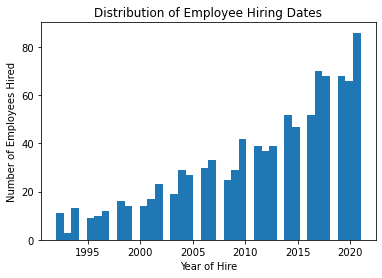

In [22]:
# Analyzing hiring trends by plotting a histogram
import matplotlib.pyplot as plt

plt.hist(pd.DatetimeIndex(data['Hire Date']).year, bins=40)
plt.xlabel('Year of Hire')
plt.ylabel('Number of Employees Hired')
plt.title('Distribution of Employee Hiring Dates')
plt.show()

##### question d1: What is the average annual salary across all employees?

In [25]:
data['Annual Salary'].mean()

113217.365

##### question d2: How does bonus percentage vary across different departments?

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

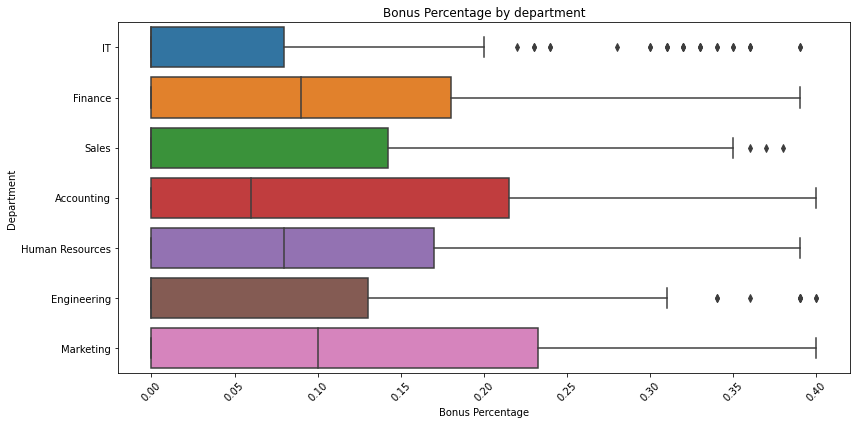

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Bonus %', y="Department", data=data)
plt.xlabel('Bonus Percentage')
plt.ylabel('Department')
plt.title('Bonus Percentage by department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
bonus_stats_by_department = data.groupby('Department')['Bonus %'].describe()

In [31]:
print("\nSummary statistics for bonus percentage by department:")
print(bonus_stats_by_department)


Summary statistics for bonus percentage by department:
                 count      mean       std  min  25%   50%     75%   max
Department                                                              
Accounting        96.0  0.111354  0.129685  0.0  0.0  0.06  0.2150  0.40
Engineering      158.0  0.071646  0.116082  0.0  0.0  0.00  0.1300  0.40
Finance          120.0  0.111583  0.118123  0.0  0.0  0.09  0.1800  0.39
Human Resources  125.0  0.107280  0.120526  0.0  0.0  0.08  0.1700  0.39
IT               241.0  0.054813  0.101000  0.0  0.0  0.00  0.0800  0.39
Marketing        120.0  0.124250  0.125836  0.0  0.0  0.10  0.2325  0.40
Sales            140.0  0.083786  0.111745  0.0  0.0  0.00  0.1425  0.38


Summary: 
- Marketing stands out with the highest mean bonus percentage and a relatively high 75th percentile, indicating that a significant portion of employees in this department receive substantial bonuses. 
- IT, Engineering and Sales have the lowest mean bonus percentages, with medians at 0%, suggesting that many employees in these departments receive little to no bonus. 
- Departments like Accounting and Marketing show higher variability (standard deviation) in bonus percentages, indicating a wider range of bonuses compared to other departments. 
- The 0% values in the minimum and 25th percentile columns across all departments indicate that a portion of employees in each department do not receive bonuses. 
- The maximum bonus percentages are similar across departments, with most departments having a maximum around 39-40%.

##### question d3: Is there any correlation between salary and bonus percentage?

In [22]:
data['Annual Salary'].corr(data['Bonus %'])

0.9256920811233008

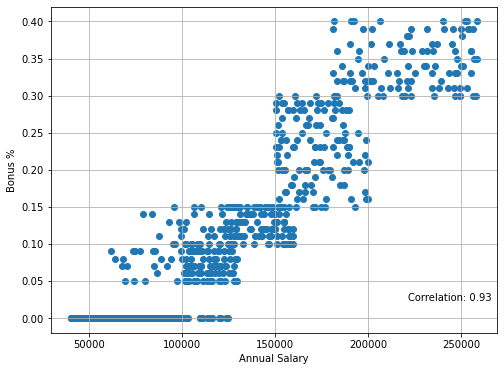

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Salary'], data['Bonus %'])
plt.xlabel('Annual Salary')
plt.ylabel('Bonus %')
plt.grid(True)
correlation = data['Annual Salary'].corr(data['Bonus %'])
plt.annotate(f"Correlation: {correlation:.2f}", xy=(0.8, 0.1), xycoords='axes fraction', fontsize=10)

plt.show()

The above correlation of '0.92' between 'Annual Salary' and 'Bonus' indicates a strong correlation. It suggests a clear upward trend, as the annual salary increases, bonus percentage also tends to increase. 

### Adding a new column called 'Tenure' in the original dataset. 

In [24]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2024-04-30


In [25]:
data['Tenure'] = data['Exit Date'] - data['Hire Date']

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   EEID           1000 non-null   int64          
 1   Full Name      1000 non-null   object         
 2   Job Title      1000 non-null   object         
 3   Department     1000 non-null   object         
 4   Business Unit  1000 non-null   object         
 5   Gender         1000 non-null   object         
 6   Ethnicity      1000 non-null   object         
 7   Age            1000 non-null   int64          
 8   Hire Date      1000 non-null   datetime64[ns] 
 9   Annual Salary  1000 non-null   int64          
 10  Bonus %        1000 non-null   float64        
 11  Country        1000 non-null   object         
 12  City           1000 non-null   object         
 13  Exit Date      85 non-null     datetime64[ns] 
 14  Tenure         85 non-null     timedelta64[ns]
dtypes: da

In [27]:
for i in range(len(data['Tenure'])):
    if pd.isna(data['Tenure'][i]) == True:
#         print(data['Tenure'][i])
        data['Tenure'][i] = (today - data['Hire Date'][i].date())

C:\Users\Deepanshu\AppData\Local\Temp\ipykernel_26148\1400650501.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tenure'][i] = (today - data['Hire Date'][i].date())


_Note: Pandas issues this warning to alert you of a potential pitfall. If you intend to modify the original DataFrame, using a copy can lead to unexpected behavior  because the changes might not be persistent. to fix this warning: use 'data.loc[i, 'Tenure']' instead of 'data['Tenure'][i]'_

In [28]:
for i in range(len(data)):
    data.loc[i, 'Tenure'] = data['Tenure'][i].days

In [29]:
data

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Tenure
0,1,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16,2017
1,2,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT,9649
2,3,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT,6396
3,4,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT,1677
4,5,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT,10389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33,2016-09-18,98427,0.00,United States,Columbus,NaT,2781
996,997,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44,2010-05-31,47387,0.00,China,Chengdu,2018-01-08,2779
997,998,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31,2019-06-10,176710,0.15,United States,Miami,NaT,1786
998,999,Lily Nguyen,Sr. Analyst,Finance,Speciality Products,Female,Asian,33,2012-01-28,95960,0.00,China,Chengdu,NaT,4476


##### question e1: What is the average tenure of employees in the company?

In [31]:
data['Tenure'].mean()
print(f"Average Tenure is: {data['Tenure'].mean():.0f} days")

Average Tenure is: 4173 days


##### question e2: Can you identify any patterns in the exit dates of employees?

Creating new columns called 'Exit Year' and 'Exit Month' in the dataset.

In [33]:
for i in range(len(data['Exit Date'])):
    if pd.isna(data['Exit Date'].dt.year[i]):
        pass
    else:
        data.loc[i, 'Exit Year'] = int(data['Exit Date'].dt.year[i])

In [34]:
for i in range(len(data['Exit Date'])):
    if pd.isna(data['Exit Date'].dt.year[i]):
        pass
    else:
        data.loc[i, 'Exit Month'] = int(data['Exit Date'].dt.month[i])

In [59]:
data.groupby(['Exit Year'])['EEID'].count()

Exit Year
1994.0     1
1996.0     1
1998.0     1
2003.0     1
2004.0     3
2005.0     1
2006.0     1
2007.0     2
2008.0     2
2009.0     1
2010.0     1
2011.0     1
2013.0     2
2014.0     4
2015.0     3
2016.0     2
2017.0     8
2018.0     4
2019.0     7
2020.0    12
2021.0    20
2022.0     7
Name: EEID, dtype: int64

In [52]:
data.groupby(['Exit Year', 'Exit Month'])['EEID'].size()

Exit Year  Exit Month
1994.0     12.0          1
1996.0     12.0          1
1998.0     10.0          1
2003.0     1.0           1
2004.0     5.0           2
                        ..
2021.0     11.0          1
2022.0     4.0           3
           5.0           1
           6.0           2
           8.0           1
Name: EEID, Length: 63, dtype: int64

In [58]:
data[data['Exit Year'] == 2021].groupby(['Exit Year', 'Exit Month'])[['EEID']].count()

EEID
Exit Year Exit Month      
2021.0    1.0            2
          2.0            1
          3.0            2
          4.0            2
          5.0            5
          6.0            1
          7.0            2
          8.0            1
          9.0            1
          10.0           2
          11.0           1

##### question e3: Is there any relationship between job title and employee turnover?

To explore the relationship between job title and employee turnover, you can calculate the turnover rate for each job title. 
Turnover rate can be defined as the percentage of employees who have left the company within a certain period of time. 

In [36]:
turnover_rate_by_job_title = data.groupby('Job Title')['Exit Date'].count() / data.groupby('Job Title')['Exit Date'].count().sum()
print(turnover_rate_by_job_title.sort_values(ascending=False))

Job Title
Director                          0.141176
Sr. Manger                        0.117647
Sr. Analyst                       0.094118
Manager                           0.058824
Analyst II                        0.058824
Business Partner                  0.058824
Analyst                           0.047059
Vice President                    0.047059
Account Representative            0.035294
Engineering Manager               0.035294
Sr. Business Partner              0.035294
Computer Systems Manager          0.023529
System Administrator              0.023529
Quality Engineer                  0.023529
Network Engineer                  0.023529
Operations Engineer               0.023529
HRIS Analyst                      0.023529
IT Systems Architect              0.011765
Network Administrator             0.011765
Test Engineer                     0.011765
Technical Architect               0.011765
Systems Analyst                   0.011765
Automation Engineer               0.011765
F

##### question f1: Which city has the highest number of employees?

In [61]:
data.value_counts('City')

City
Seattle           118
Columbus          113
Miami             112
Phoenix           109
Austin             99
Chicago            92
Chongqing          65
Beijing            55
Sao Paulo          53
Shanghai           52
Chengdu            46
Rio de Janerio     44
Manaus             42
dtype: int64

##### question f2: Are there differences in salary or bonus percentage based on the country of employment?

To analyze whether there are differences in salary or bonus percentage based on the country of employment, 
we can calculate summary statistics such as the mean, median, minimum, and maximum for each country. 

In [34]:
# Calculate summary statistics for salary by country
salary_stats_by_country = data.groupby('Country')['Annual Salary'].describe()

# Calculate summary statistics for bonus percentage by country
bonus_stats_by_country = data.groupby('Country')['Bonus %'].describe()

# Display the summary statistics
print("Summary statistics for salary by country:")
print(salary_stats_by_country)

print("\nSummary statistics for bonus percentage by country:")
print(bonus_stats_by_country)

Summary statistics for salary by country:
               count           mean           std      min      25%      50%  \
Country                                                                        
Brazil         139.0  112324.834532  53333.949732  40316.0  71405.0  96441.0   
China          218.0  113823.532110  51218.915330  41728.0  73901.0  97384.0   
United States  643.0  113204.794712  54434.206703  40063.0  70261.5  96313.0   

                    75%       max  
Country                            
Brazil         147053.0  258426.0  
China          149143.0  257194.0  
United States  151743.0  258498.0  

Summary statistics for bonus percentage by country:
               count      mean       std  min  25%  50%   75%  max
Country                                                           
Brazil         139.0  0.086763  0.118280  0.0  0.0  0.0  0.15  0.4
China          218.0  0.084954  0.110684  0.0  0.0  0.0  0.14  0.4
United States  643.0  0.090327  0.120240  0.0  0.0  0.0 

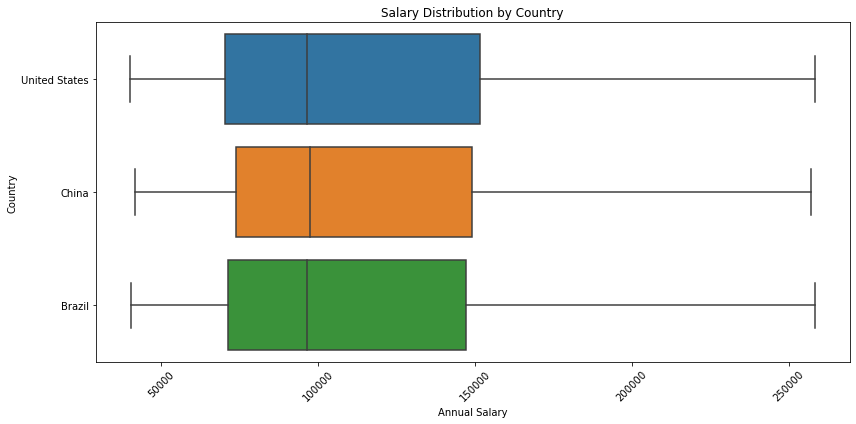

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Annual Salary', y='Country', data=data)
plt.xlabel('Annual Salary')
plt.ylabel('Country')
plt.title('Salary Distribution by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

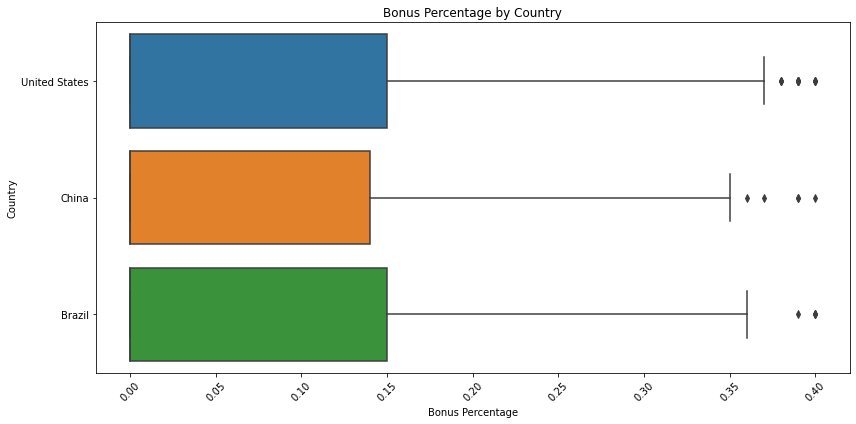

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Bonus %', y='Country', data=data)
plt.xlabel('Bonus Percentage')
plt.ylabel('Country')
plt.title('Bonus Percentage by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
data.columns

Index(['EEID', 'Full Name', 'Job Title', 'Department', 'Business Unit',
       'Gender', 'Ethnicity', 'Age', 'Hire Date', 'Annual Salary', 'Bonus %',
       'Country', 'City', 'Exit Date', 'Tenure', 'Exit Year', 'Exit Month'],
      dtype='object')

##### question f3: Do certain cities have higher turnover rates than others?

In [67]:
# Calculate turnover rate by city
# Define turnover rate as the percentage of employees who have exited the company
turnover_rate_by_city = data.groupby('City')['Exit Date'].count() / data.groupby('City')['Exit Date'].count().sum() * 100

# Display turnover rate by city
print("Turnover rate by city:")
print(turnover_rate_by_city.sort_values(ascending=False))

Turnover rate by city:
City
Miami             15.294118
Austin            12.941176
Columbus          10.588235
Seattle            9.411765
Chicago            8.235294
Chongqing          8.235294
Beijing            7.058824
Manaus             5.882353
Phoenix            5.882353
Chengdu            4.705882
Sao Paulo          4.705882
Shanghai           4.705882
Rio de Janerio     2.352941
Name: Exit Date, dtype: float64


##### question g1: How does the salary distribution differ between genders?

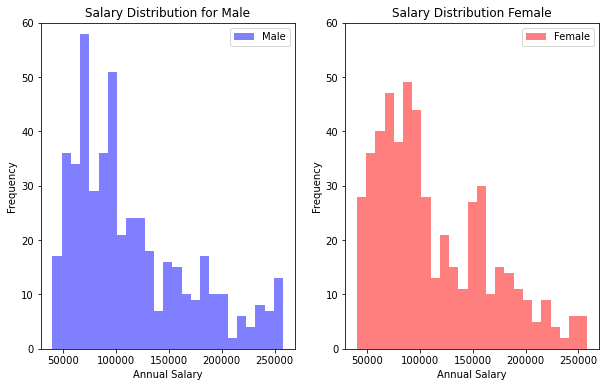

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# ploting histogram to draw visualization
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(data[data['Gender'] == 'Male']['Annual Salary'], bins=25, color='blue', alpha=0.5, label='Male')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.ylim(0, 60)
plt.title('Salary Distribution for Male')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(data[data['Gender'] == 'Female']['Annual Salary'], bins=25, color='red', alpha=0.5, label='Female')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.ylim(0, 60)
plt.title('Salary Distribution Female')
plt.legend()

plt.show()